In [1]:
import geopandas as gpd
import pygadm

import atlite
import logging

logging.basicConfig(level=logging.INFO)

<Axes: >

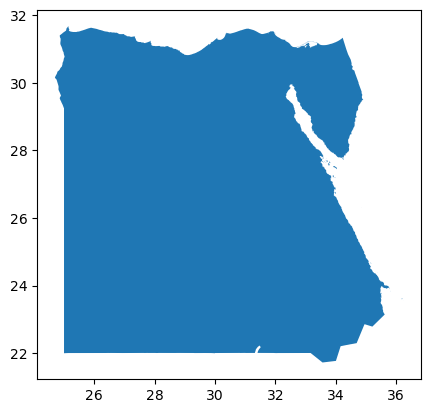

In [2]:
country_code = 'EGY' #ISO 3 letters

#get country shape from gadm.org via pygadm package
gadm_data = pygadm.Items(admin=country_code)
country = gadm_data

#pygadm lib extracts information from the GADM dataset as GeoPandas GeoDataFrame. GADM.org provides files in coordinate reference system is longitude/latitude and the WGS84 datum.
country.set_crs('epsg:4326', inplace=True) 

country.plot()

In [3]:
#calculate bounding box with 1000m buffer (region needs to be in projected CRS so meters are the unit)
region_copy = country
region_copy.to_crs(epsg=4087, inplace=True) #epsg 4087 world equidistant cylindrical
region_copy['buffered']=region_copy.buffer(10000)
# Convert buffered region back to EPSC 4326 to get bounding box latitude and longitude 
region_buffered_4326 = region_copy.set_geometry('buffered').to_crs(epsg=4326)
bounding_box = region_buffered_4326['buffered'].total_bounds
print(f"Bounding box: \nminx: {bounding_box[0]}, miny: {bounding_box[1]}, maxx: {bounding_box[2]}, maxy: {bounding_box[3]}")

Bounding box: 
minx: 24.60836161081233, miny: 21.635568515814445, maxx: 36.33830105162701, maxy: 31.75713781049418


In [4]:
#cutout atlite needs x-slice (longitude) and y-slice (latitude)
#https://de.wikipedia.org/wiki/Geographische_Koordinaten

x = (bounding_box[0], bounding_box[2])
y = (bounding_box[1], bounding_box[3])

print(x) 
print(y)

(24.60836161081233, 36.33830105162701)
(21.635568515814445, 31.75713781049418)


# get cutout with atlite (copy the bounds from above)

In [5]:
cutout = atlite.Cutout(
    path="egypt-2015-wind2-era5.nc",
    module="era5", 
    x=slice(24.60836161081233, 36.33830105162701),  
    y=slice(21.635568515814445, 31.75713781049418),
    time="2015",
)

INFO:atlite.cutout:Building new cutout egypt-2015-wind2-era5.nc


In [6]:
cutout.prepare(features=['wind'], monthly_requests=True, concurrent_requests=True, compression=None) 
#cutout.prepare(features=['influx', 'temperature'], monthly_requests=True, concurrent_requests=True, compression=None) 

INFO:atlite.data:Storing temporary files in C:\Users\b396636\AppData\Local\Temp\tmp73hk901v
INFO:atlite.data:Calculating and writing with module era5:


INFO:atlite.datasets.era5:Requesting data for feature wind...
c:\Users\b396636\AppData\Local\anaconda3\envs\atlite\Lib\site-packages\cads_api_client\legacy_api_client.py:101: UserWarning: This is a beta version. The following parameters have not been implemented yet: {'info_callback': <bound method Logger.debug of <Logger atlite.datasets.era5 (INFO)>>}.
  warnings.warn(
2024-10-13 20:15:43,652 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T in July 2024 - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-10-13 20:15:43,656 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T in July 2024 - please refer to our
[Forum announcement](

40ec09cf80b3e5a3ea073da80d24c56a.nc:   0%|          | 0.00/8.05M [00:00<?, ?B/s]

2024-10-13 20:20:02,167 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
2024-10-13 20:20:02,623 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-4)
	100m_v_component_of_wind (2015-4)
	forecast_surface_roughness (2015-4)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/7c9564d779b96917128f7ee9adf82c98.nc


7c9564d779b96917128f7ee9adf82c98.nc:   0%|          | 0.00/7.89M [00:00<?, ?B/s]

2024-10-13 20:22:02,346 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:22:03,018 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-8)
	100m_v_component_of_wind (2015-8)
	forecast_surface_roughness (2015-8)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/46020ece3d20cafa2b92c99a91f38ad8.nc


46020ece3d20cafa2b92c99a91f38ad8.nc:   0%|          | 0.00/8.07M [00:00<?, ?B/s]

2024-10-13 20:26:02,866 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
2024-10-13 20:26:03,244 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-1)
	100m_v_component_of_wind (2015-1)
	forecast_surface_roughness (2015-1)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/2ac8cc502949bed1ce5131e77e5a746d.nc


2ac8cc502949bed1ce5131e77e5a746d.nc:   0%|          | 0.00/8.21M [00:00<?, ?B/s]

2024-10-13 20:28:03,103 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:28:03,758 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-11)
	100m_v_component_of_wind (2015-11)
	forecast_surface_roughness (2015-11)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/980d1b7e57f4e56cbfc7750526f48d20.nc


980d1b7e57f4e56cbfc7750526f48d20.nc:   0%|          | 0.00/7.84M [00:00<?, ?B/s]

2024-10-13 20:30:05,320 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
2024-10-13 20:30:05,439 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-9)
	100m_v_component_of_wind (2015-9)
	forecast_surface_roughness (2015-9)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/8775c8ea64122677a4cc91f9596646a9.nc


8775c8ea64122677a4cc91f9596646a9.nc:   0%|          | 0.00/7.84M [00:00<?, ?B/s]

2024-10-13 20:32:04,837 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:32:05,836 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-3)
	100m_v_component_of_wind (2015-3)
	forecast_surface_roughness (2015-3)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/330c1a576ed60d642c8a4e331e2c8787.nc


330c1a576ed60d642c8a4e331e2c8787.nc:   0%|          | 0.00/8.22M [00:00<?, ?B/s]

2024-10-13 20:36:03,951 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:36:05,376 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-5)
	100m_v_component_of_wind (2015-5)
	forecast_surface_roughness (2015-5)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/cb38c33f6072862b398d065aeb8ca81b.nc


cb38c33f6072862b398d065aeb8ca81b.nc:   0%|          | 0.00/8.19M [00:00<?, ?B/s]

2024-10-13 20:38:04,270 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-6)
	100m_v_component_of_wind (2015-6)
	forecast_surface_roughness (2015-6)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/44dc57b6982b15acf572c45514b1e98c.nc
2024-10-13 20:38:04,961 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running


44dc57b6982b15acf572c45514b1e98c.nc:   0%|          | 0.00/7.86M [00:00<?, ?B/s]

2024-10-13 20:40:05,216 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-12)
	100m_v_component_of_wind (2015-12)
	forecast_surface_roughness (2015-12)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/5ab852f9105e7cbd6ba3c9fce030a4e1.nc


5ab852f9105e7cbd6ba3c9fce030a4e1.nc:   0%|          | 0.00/8.13M [00:00<?, ?B/s]

2024-10-13 20:40:09,684 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:42:05,197 INFO status has been updated to running
INFO:cads_api_client.processing:status has been updated to running
2024-10-13 20:42:10,152 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-10)
	100m_v_component_of_wind (2015-10)
	forecast_surface_roughness (2015-10)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/79ab2e7b38f2589cc6d5cd63ab196aa9.nc


79ab2e7b38f2589cc6d5cd63ab196aa9.nc:   0%|          | 0.00/8.07M [00:00<?, ?B/s]

2024-10-13 20:44:05,580 INFO status has been updated to successful
INFO:cads_api_client.processing:status has been updated to successful
INFO:atlite.datasets.era5:CDS: Downloading variables
	100m_u_component_of_wind (2015-2)
	100m_v_component_of_wind (2015-2)
	forecast_surface_roughness (2015-2)

INFO:multiurl.base:Downloading https://object-store.os-api.cci2.ecmwf.int:443/cci2-prod-cache/536c58e33f66d79cf0326887cf354795.nc


536c58e33f66d79cf0326887cf354795.nc:   0%|          | 0.00/7.45M [00:00<?, ?B/s]

<Cutout "egypt-2015-wind2-era5">
 x = 24.75 ⟷ 36.25, dx = 0.25
 y = 21.75 ⟷ 31.75, dy = 0.25
 time = 2015-01-01 ⟷ 2015-12-31, dt = h
 module = era5
 prepared_features = ['wind']